<div align="center">
  <h1 style="text-align: center; background-color: lightblue; padding: 10px;">Drugs Project</h1>
</div>

<div style="background-color: lightblue; padding: 10px;">
     

### Drugs Project is a way to help medicinal chemists design some compounds that could be accepted by the FDA
### Collected the data from ChEMBL website 
### The last update of the data was Jan 2023 and it contains 2,354,965 compounds


# Content

### 1. Introduction 
### 2. Target
### 3. Overview of the data
### 4. Explore Small molecules
### 5. Recommendation
### 6. Source code

# 1. Introduction

### The drug discovery process needs almost **15 years** and costs millions of euros to reach the market

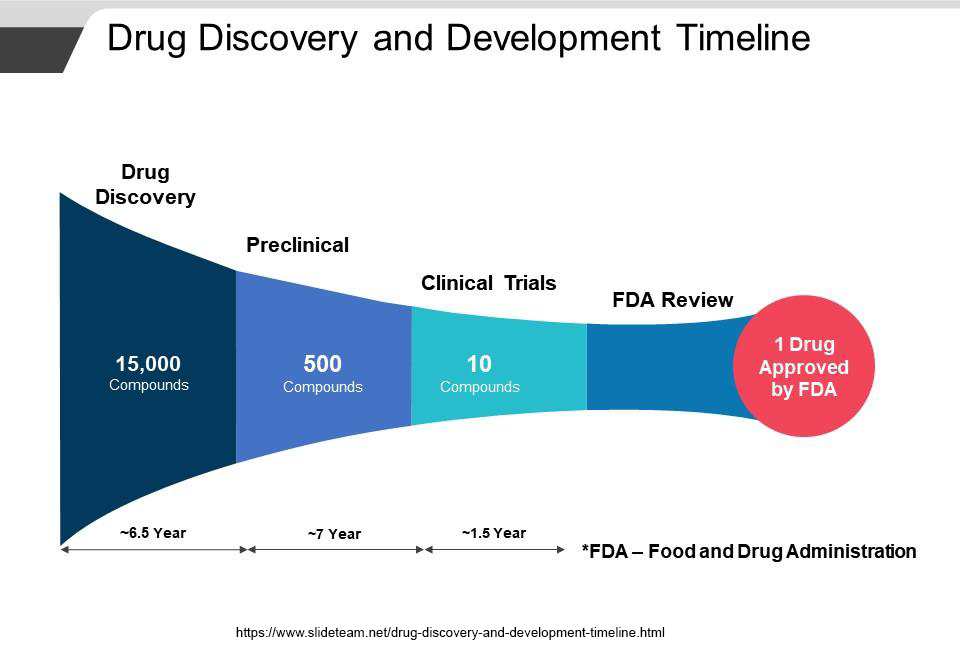

In [1]:
from IPython import display
display.Image ("/kaggle/input/graphs/15_drug_discovery_and_development_timeline.png")

<div style="background-color: lightblue; padding: 10px;">
    
# 2. Target

### Desinging compounds that will have a high chance for FDA Approval

# 3. Overview of the data

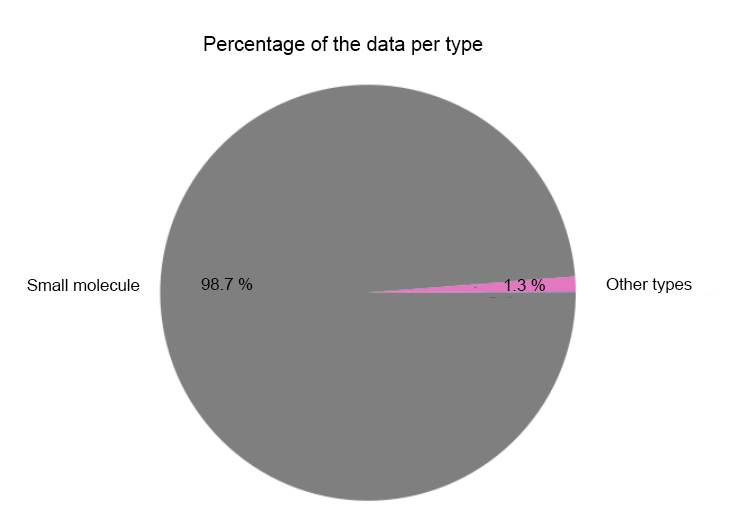

In [2]:
display.Image ("/kaggle/input/graphs/6_perc_per_type.png")

<div style="background-color: lightblue; padding: 10px;">
    
### Almost 99% are small molecle 
### 1% are Antibody, Cell, Enzyme, Gene, Oligonucleotide, Oligosaccharide and Protein

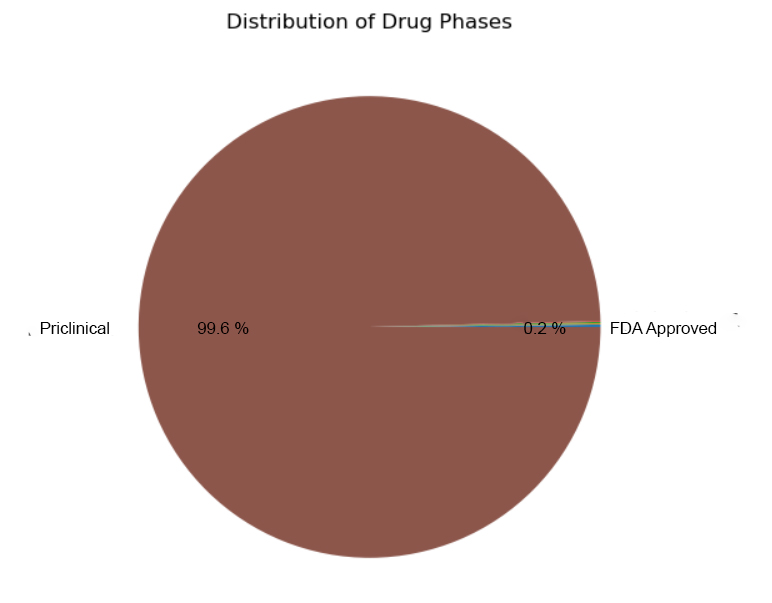

In [3]:
display.Image ("/kaggle/input/graphs/3_Distribution of Drug phases 2.jpg")

<div style="background-color: lightblue; padding: 10px;">
    
### 99.8% of drugs can not pass the priclinical and go to early phase 1 
### 0.18% can pass all the phases and has the FDA 




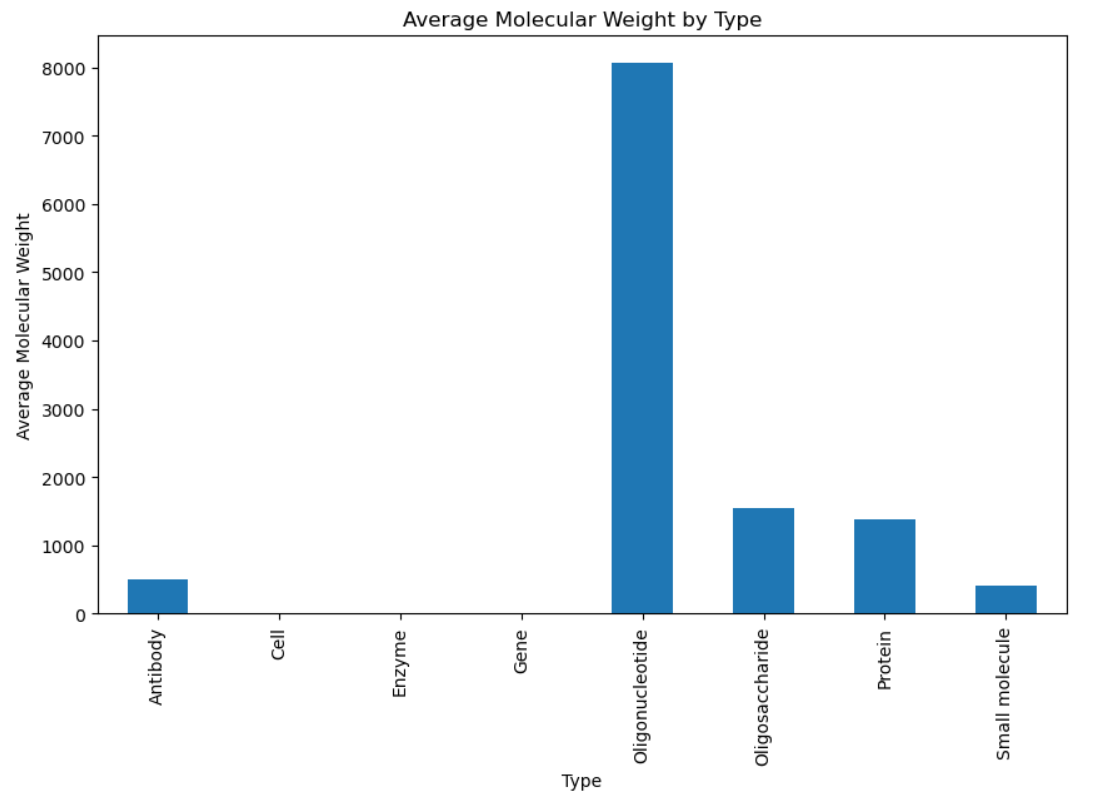

In [4]:
display.Image ("/kaggle/input/graphs/1_Av_mwt_by_type.PNG")

<div style="background-color: lightblue; padding: 10px;">

### Small Molecule has the smalles average Mwt around 418 
### Oligonucleotide has the biggest average Mwt around 8059

### Most of the data are small molecules, try to invstigate it for better understanding

# 4. Explore Small molecules

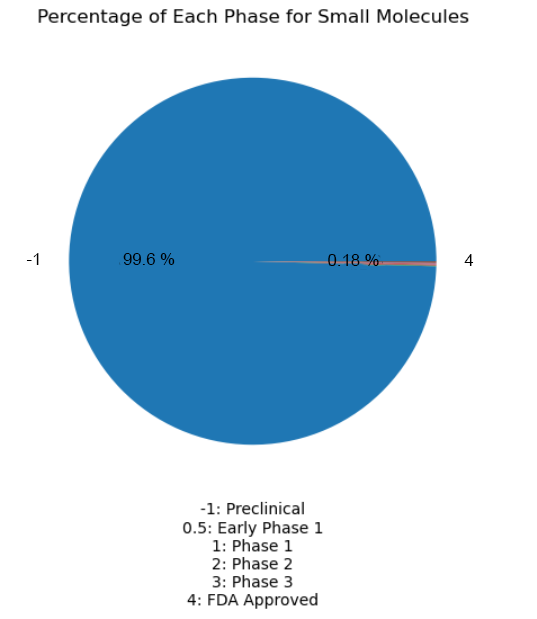

In [5]:
display.Image ("/kaggle/input/graphs/9_Each_phase_small_molec2.png")

<div style="background-color: lightblue; padding: 10px;">
    
### 99.6% of drugs can not pass the priclinical and go to early phase 1 
### 0.18% can pass all the phases and has the FDA 

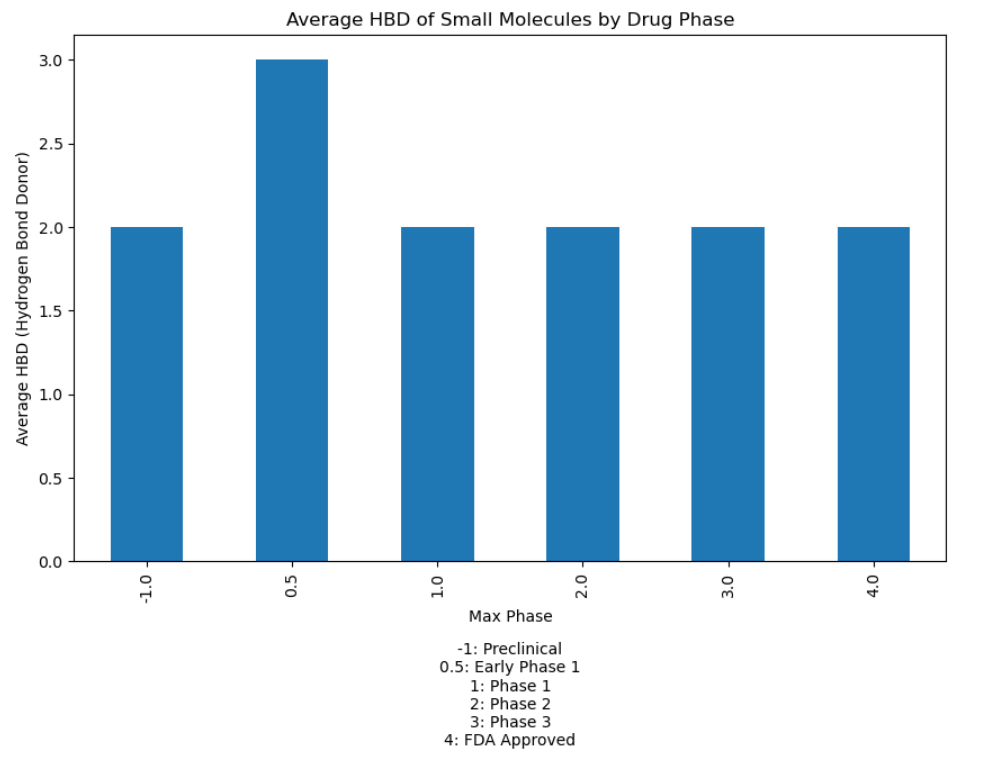

In [6]:
display.Image ("/kaggle/input/graphs/11_HBD.PNG")

<div style="background-color: lightblue; padding: 10px;">
    
### Most of the phases has 2 HBD
### Only Early phases has 3 HBD

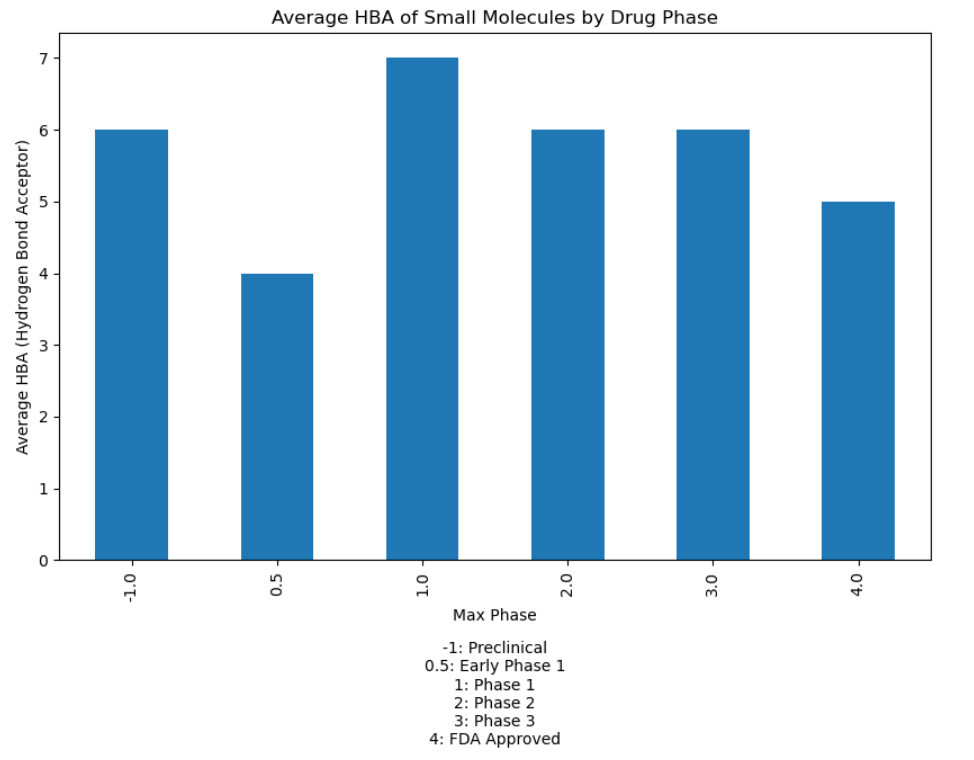

In [7]:
display.Image ("/kaggle/input/graphs/10_HBA.PNG")

<div style="background-color: lightblue; padding: 10px;">
    
### FDA Approved has 5 HBA
### Priclinical and other phases have 6 

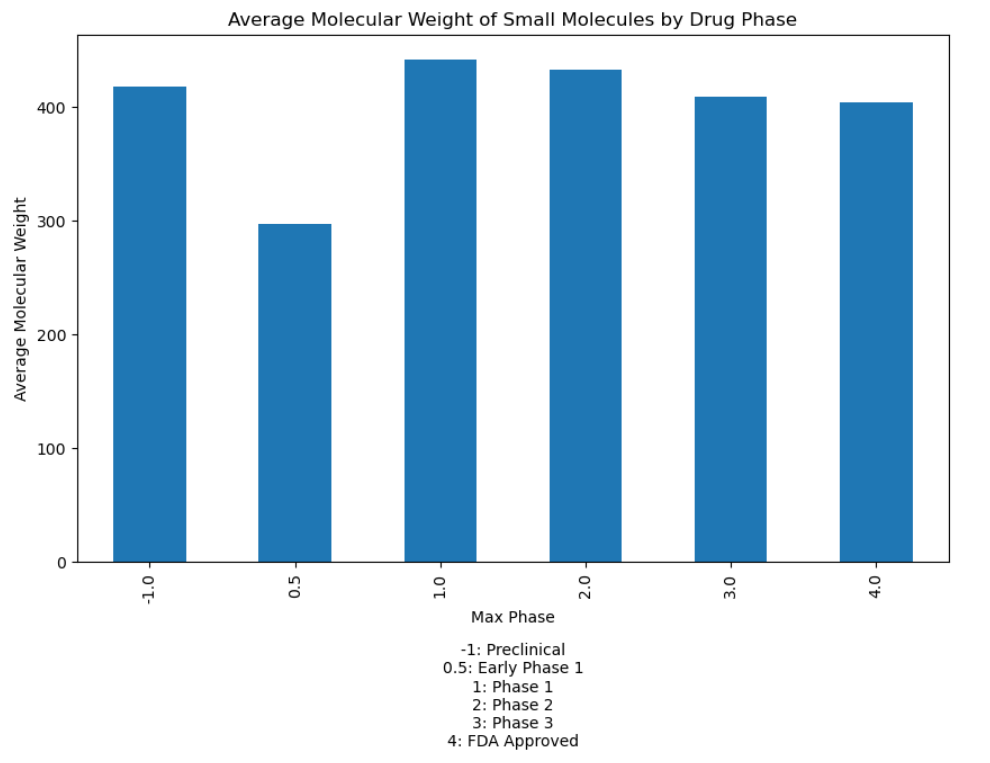

In [8]:
display.Image ("/kaggle/input/graphs/12_Mwt.PNG")

<div style="background-color: lightblue; padding: 10px;">
    
### Almost all phases has average Mwt around 400 daltons

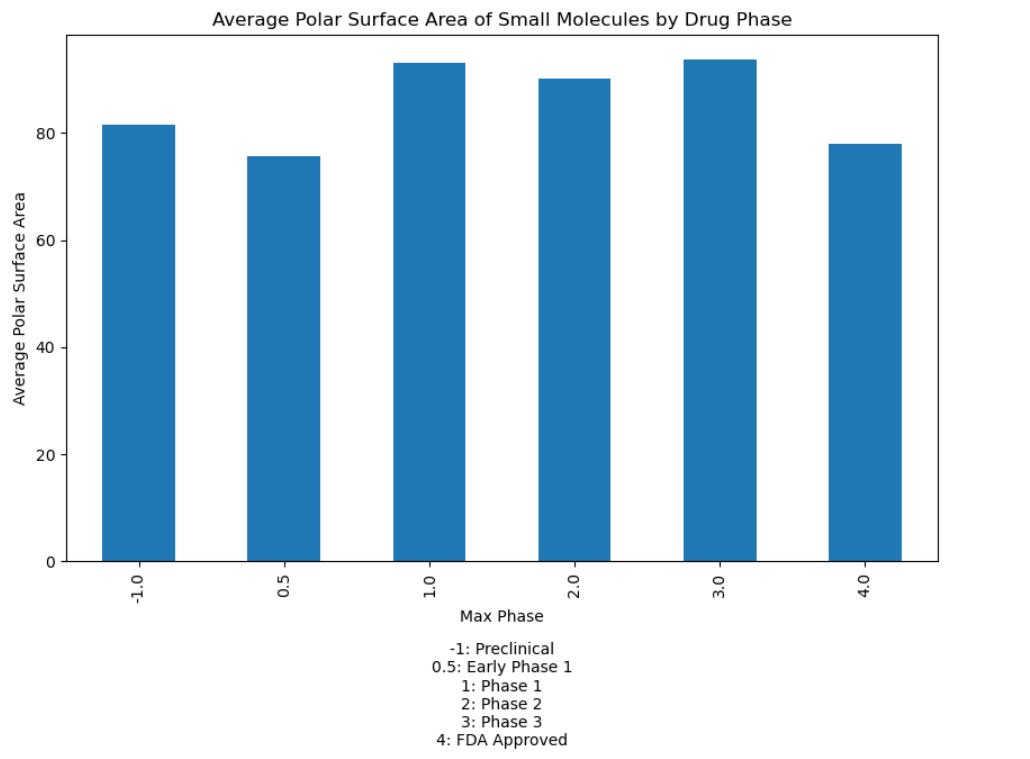

In [9]:
display.Image ("/kaggle/input/graphs/13_PSA.PNG")

<div style="background-color: lightblue; padding: 10px;">
    
### Almost all phases has PSA around 80 

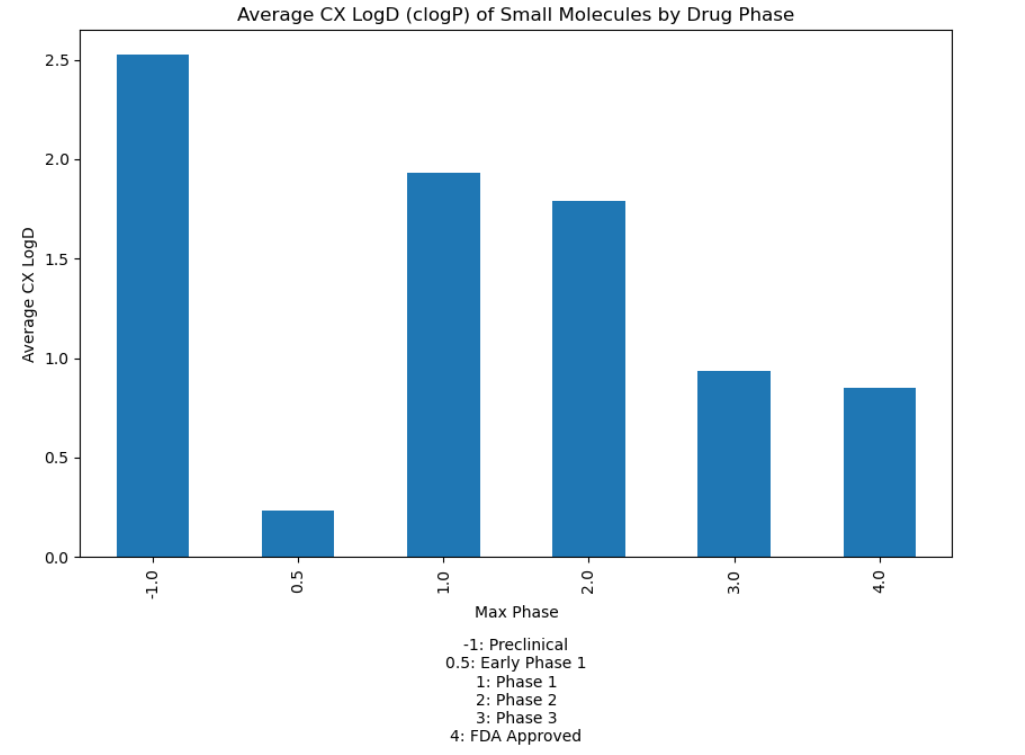

In [10]:
display.Image ("/kaggle/input/graphs/7_ClogD.PNG")

<div style="background-color: lightblue; padding: 10px;">
    
### Most of Phase 3 and FDA Approved drugs has lower than 1 clogD

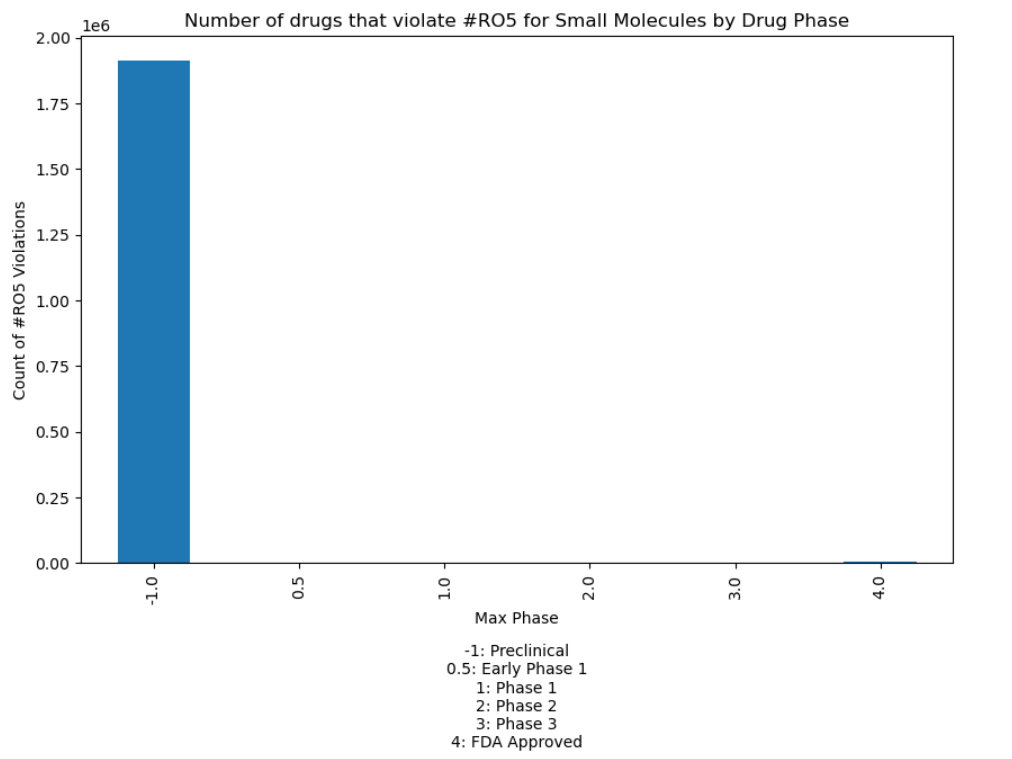

In [11]:
display.Image ("/kaggle/input/graphs/14_Violate_RO5.PNG")

<div style="background-color: lightblue; padding: 10px;">
    
### 99% of the small drugs has at least 1 violation to Lib RO5

# 5. Recommendation 

### Following Lipinski rule of five might help in increase the possibility passing the drugs all 

<div style="background-color: lightblue; padding: 10px;">
    
# 6. Source code

#### Below is the code for your reference

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("/kaggle/input/most-drugs/All Drugs.csv", on_bad_lines='skip') #upload all compounds CSV

In [14]:
df = pd.read_csv("/kaggle/input/most-drugs/All Drugs.csv", on_bad_lines='skip', sep=";") #Print the name of the header in the file
print(df.columns)

/tmp/ipykernel_20/1853848367.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/most-drugs/All Drugs.csv", on_bad_lines='skip', sep=";") #Print the name of the header in the file


Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Np Likeness Score',
       'Molecular Species', 'Molecular Formula', 'Smiles', 'Inchi Key'],
      dtype='object')


In [15]:
df["Max Phase"].fillna(-1, inplace=True) #combine all priclinical together

In [16]:
df_filtered = df[df['Type'] != 'Unknown']

average_mwt_type = df_filtered.groupby('Type')['Molecular Weight'].mean() #Avergae Mwt of drugs based on the type

print(average_mwt_type)


Type
Antibody            504.450000
Cell                       NaN
Enzyme                     NaN
Gene                       NaN
Oligonucleotide    8059.125088
Oligosaccharide    1539.738372
Protein            1385.289266
Small molecule      418.470848
Name: Molecular Weight, dtype: float64


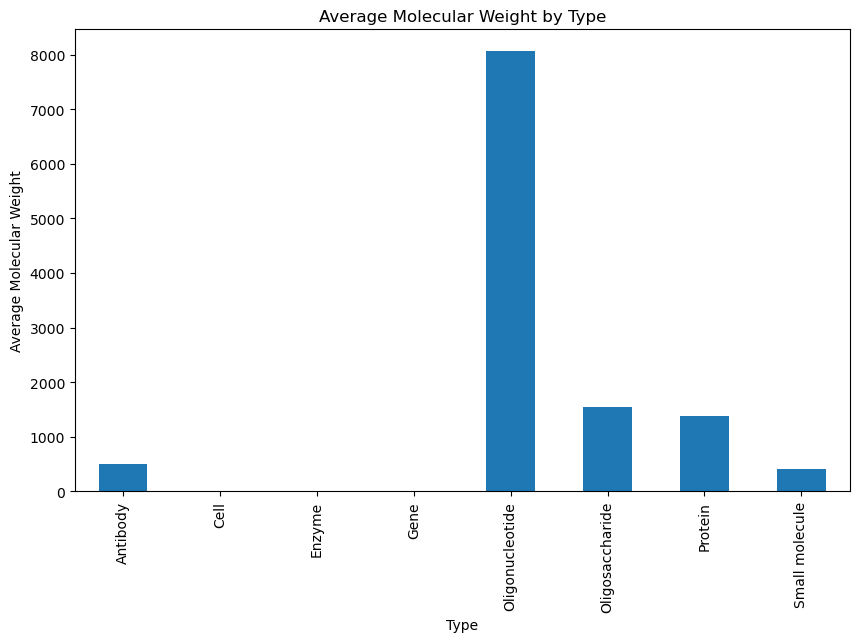

<Figure size 640x480 with 0 Axes>

In [17]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_mwt_type.plot(kind='bar')

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Average Molecular Weight')
plt.title('Average Molecular Weight by Type')

# Display the chart
plt.show()

plt.savefig('Average_Molecular_Weight2.png')


In [18]:
count_approved = df['Max Phase'].value_counts().get(4, 0) #count number of approved drugs
print(count_approved)
 
percentage_approved = (count_approved / len(df)) * 100   #calcualte percentage of approved drugs
print(percentage_approved)

count_phase_3 = df['Max Phase'].value_counts().get(3, 0) #count number of phase 3 drugs
print(count_phase_3)
 
percentage_phase_3 = (count_phase_3 / len(df)) * 100   #calcualte percentage of phase 3 drugs
print(percentage_phase_3)

count_phase_2 = df['Max Phase'].value_counts().get(2, 0) #count number of phase 2 drugs
print(count_phase_2)
 
percentage_phase_2 = (count_phase_2 / len(df)) * 100   #calcualte percentage of phase 2 drugs
print(percentage_phase_2)

count_phase_1 = df['Max Phase'].value_counts().get(1, 0) #count number of phase 1 drugs
print(count_phase_1)
 
percentage_phase_1 = (count_phase_1 / len(df)) * 100   #calcualte percentage of phase 1 drugs
print(percentage_phase_1)

count_early_phase_1 = df['Max Phase'].value_counts().get(0.5, 0) #count number of Early phase 1 drugs
print(count_early_phase_1)
 
percentage_early_phase_1 = (count_early_phase_1 / len(df)) * 100   #calcualte percentage of Early phase 1 drugs
print(percentage_early_phase_1)

count_pri = df['Max Phase'].value_counts().get(-1, 0) #count number of priclinical drugs
print(count_pri)
 
percentage_pri = (count_pri / len(df)) * 100   #calcualte percentage of priclinical drugs
print(percentage_pri)

4194
0.1780918187743767
1735
0.07367413103804091
2474
0.10505463987787503
1595
0.06772924438367449
29
0.0012314408069758998
2344938
99.57421872511905


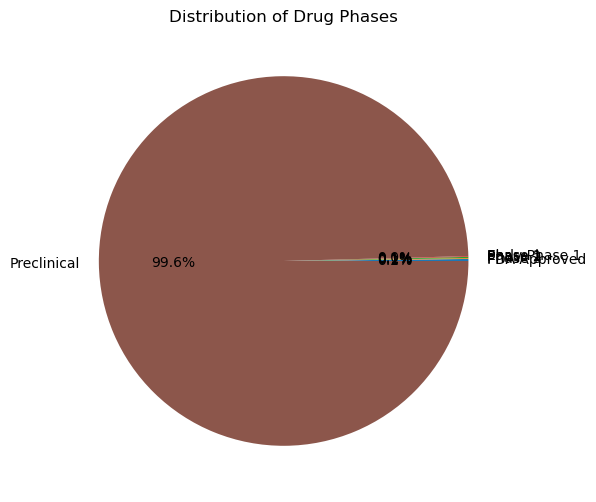

In [19]:
labels = ['FDA Approved', 'Phase 3', 'Phase 2', 'Phase 1', 'Early Phase 1', 'Preclinical']
sizes = [count_approved, count_phase_3, count_phase_2, count_phase_1, count_early_phase_1, count_pri]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Drug Phases')

# Display the chart
plt.show()

In [20]:
avg_mol_weight = df.groupby('Max Phase')['Molecular Weight'].mean() #Avergae Mwt of drugs based on the Phase

print(avg_mol_weight)


Max Phase
-1.0    433.736497
 0.5    443.548696
 1.0    497.091703
 2.0    482.306748
 3.0    513.281207
 4.0    448.204846
Name: Molecular Weight, dtype: float64


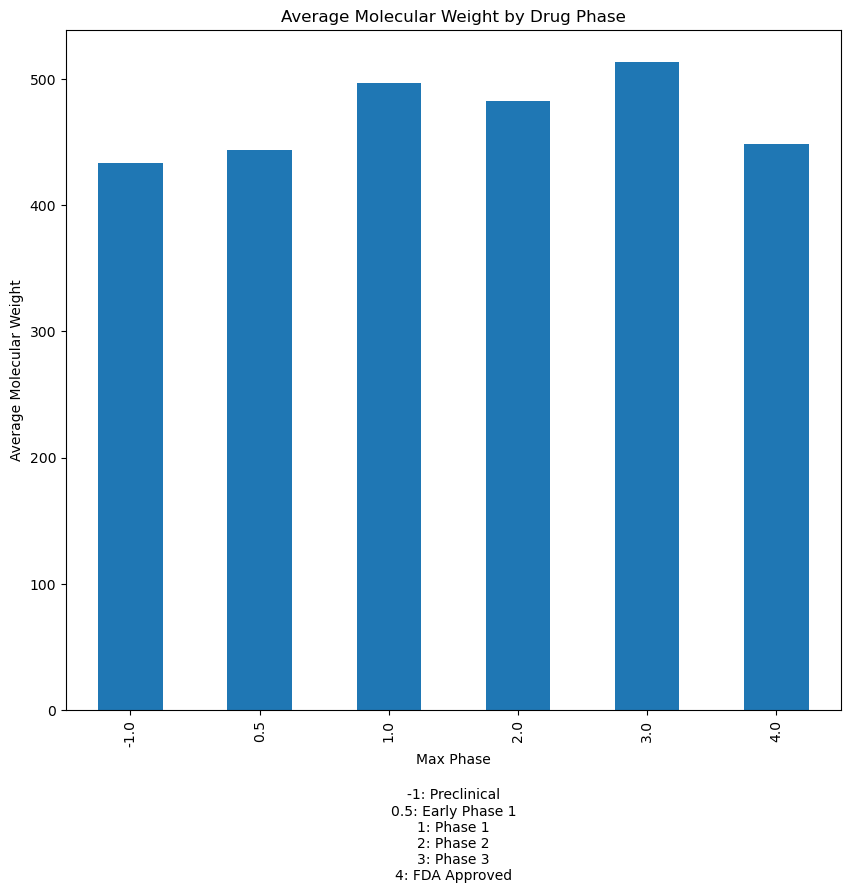

In [21]:
# Create a bar chart
plt.figure(figsize=(10, 10))
avg_mol_weight.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Average Molecular Weight')
plt.title('Average Molecular Weight by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.25, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.2)

# Display the chart
plt.show()

In [22]:
average_approved = df['Molecular Weight'].mean()#Average Mwt. of Approved drugs
print(average_approved)

433.8559150306472


In [23]:
grouped = df.groupby("Max Phase")["Max Phase"].value_counts()  #Total number of each pahse, -1 priclinical, 0.5 early phase, 1,2 and 3 are phase, 4 approved
print(grouped)

Max Phase  Max Phase
-1.0       -1.0         2344938
 0.5        0.5              29
 1.0        1.0            1595
 2.0        2.0            2474
 3.0        3.0            1735
 4.0        4.0            4194
Name: Max Phase, dtype: int64


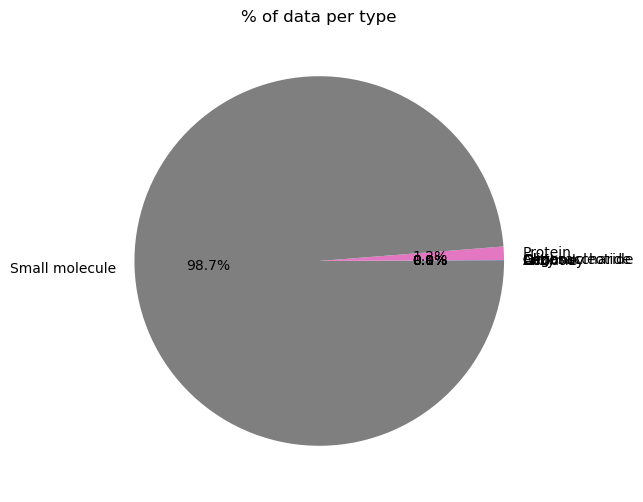

In [24]:
grouped = df[df['Type'] != 'Unknown'].groupby('Type')['Type'].count()

# Create a pie chart
plt.figure(figsize=(8, 6))
grouped = grouped[grouped.index != 'Unknown']  # Exclude 'unknown' group
grouped.plot(kind='pie', autopct='%1.1f%%')

# Add labels and title
plt.ylabel('')
plt.title('% of data per type')

# Display the chart
plt.show()

# Almost 99% are small molecle 
# 1% are Antibody, Cell, Enzyme, Gene, Oligonucleotide, Oligosaccharide and Protein

In [25]:
no_small_phase = df.groupby('Max Phase')['Type'].count() #number of each phase for small molecule

print(no_small_phase)

Max Phase
-1.0    2344938
 0.5         29
 1.0       1595
 2.0       2474
 3.0       1735
 4.0       4194
Name: Type, dtype: int64


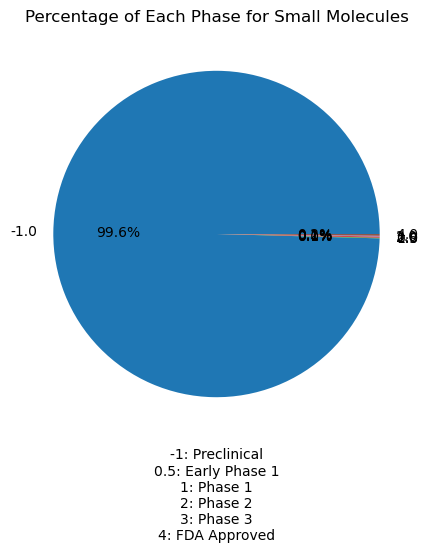

In [26]:
# Create a pie chart
plt.figure(figsize=(8, 6))
no_small_phase.plot(kind='pie', autopct='%1.1f%%')

# Add labels and title
plt.ylabel('')
plt.title('Percentage of Each Phase for Small Molecules')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.25, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.2)

# Display the chart
plt.show()

# 99.6% of drugs can not pass the priclinical and go to early phase 1 
# 0.18% can pass all the phases and has the FDA 

In [27]:
df_small_drugs = df[df['Type'] == 'Small molecule'] #small drugs

In [28]:
average_mwt_small_molecule = df_small_drugs['Molecular Weight'].mean() #Avergae Mwt of small drugs
print(average_mwt_small_molecule)

418.4708480606633


In [29]:
max_mwt_small_molecule = df_small_drugs['Molecular Weight'].max() #Max Mwt of small drugs
print(max_mwt_small_molecule)

12546.32


In [30]:
min_mwt_small_molecule = df_small_drugs['Molecular Weight'].min() #Min Mwt of small drugs
print(min_mwt_small_molecule)

4.0


In [31]:
min_mwt_small_molecule = df_small_drugs['Molecular Weight'].min() #row of the minimum Mwt in small molecule
df_min_mwt = df_small_drugs[df_small_drugs['Molecular Weight'] == min_mwt_small_molecule]
print(df_min_mwt)

             ChEMBL ID    Name                                       Synonyms  \
2259169  CHEMBL1796997  HELIUM  E-939|E939|HELIUM|HELIUM-4|INS NO.939|INS-939   

                   Type  Max Phase  Molecular Weight  Targets  Bioactivities  \
2259169  Small molecule        4.0               4.0      1.0            3.0   

        AlogP Polar Surface Area  ... Heavy Atoms HBA (Lipinski)  \
2259169  None               None  ...        None           None   

        HBD (Lipinski) #RO5 Violations (Lipinski)  \
2259169           None                       None   

        Molecular Weight (Monoisotopic) Np Likeness Score Molecular Species  \
2259169                          4.0026              None              None   

        Molecular Formula Smiles                    Inchi Key  
2259169                He   [He]  SWQJXJOGLNCZEY-UHFFFAOYSA-N  

[1 rows x 33 columns]


In [32]:
df['HBD (Lipinski)'] = pd.to_numeric(df['HBD (Lipinski)'], errors='coerce') 
average_hbd_phases = df[df['Type'] == 'Small molecule'].groupby('Max Phase')['HBD (Lipinski)'].mean().round().astype(int) #avergae HBD of small molecule for each phase

print(average_hbd_phases)

Max Phase
-1.0    2
 0.5    3
 1.0    2
 2.0    2
 3.0    2
 4.0    2
Name: HBD (Lipinski), dtype: int64


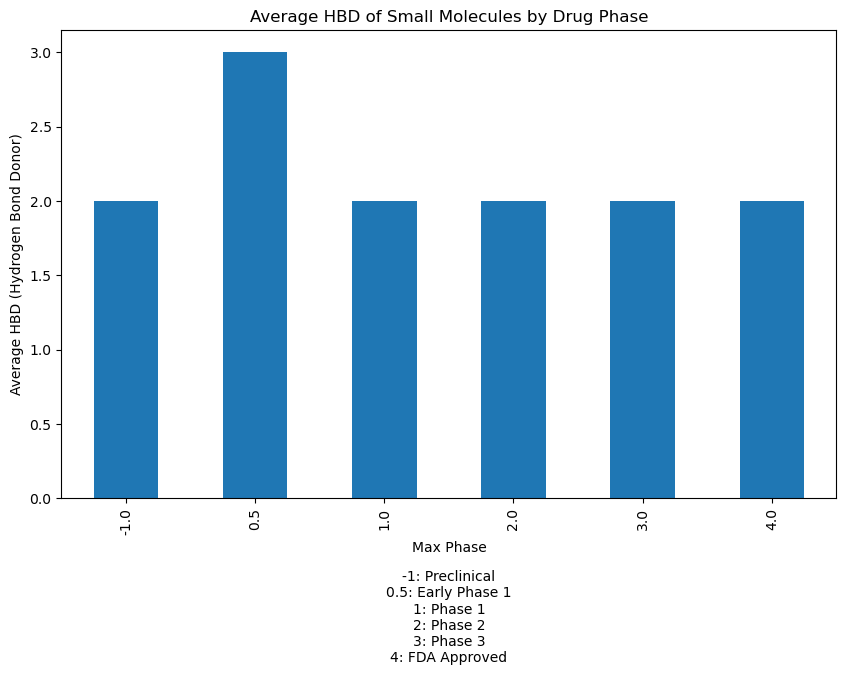

In [33]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_hbd_phases.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Average HBD (Hydrogen Bond Donor)')
plt.title('Average HBD of Small Molecules by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.35, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.1)

# Display the chart
plt.show()

# almost all phases has 2 HBD

In [34]:
df['HBA (Lipinski)'] = pd.to_numeric(df['HBA (Lipinski)'], errors='coerce') 
average_hba_phases = df[df['Type'] == 'Small molecule'].groupby('Max Phase')['HBA (Lipinski)'].mean().astype(int) #avergae HBA of small molecule for each phase
print(average_hba_phases)

Max Phase
-1.0    6
 0.5    4
 1.0    7
 2.0    6
 3.0    6
 4.0    5
Name: HBA (Lipinski), dtype: int64


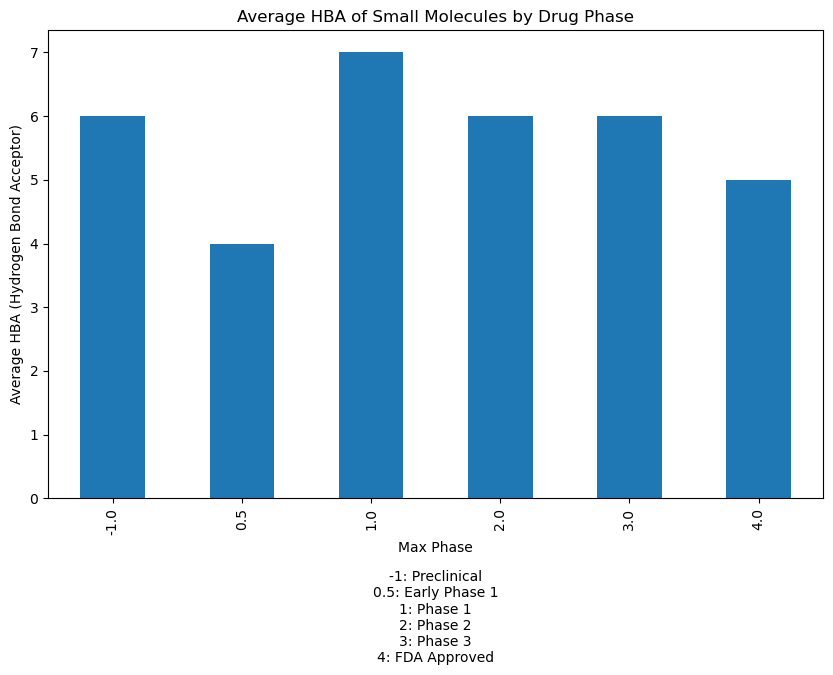

In [35]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_hba_phases.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Average HBA (Hydrogen Bond Acceptor)')
plt.title('Average HBA of Small Molecules by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.35, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.1)

# Display the chart
plt.show()
# FDA Approved has 5 HBA
# Priclinical and other phases have 6 

In [36]:
average_mwt_phases = df[df['Type'] == 'Small molecule'].groupby('Max Phase')['Molecular Weight'].mean() #avergae Mwt of small molecule for each phase
print(average_mwt_phases)

Max Phase
-1.0    418.479676
 0.5    297.771429
 1.0    441.580890
 2.0    433.428695
 3.0    409.697898
 4.0    404.846308
Name: Molecular Weight, dtype: float64


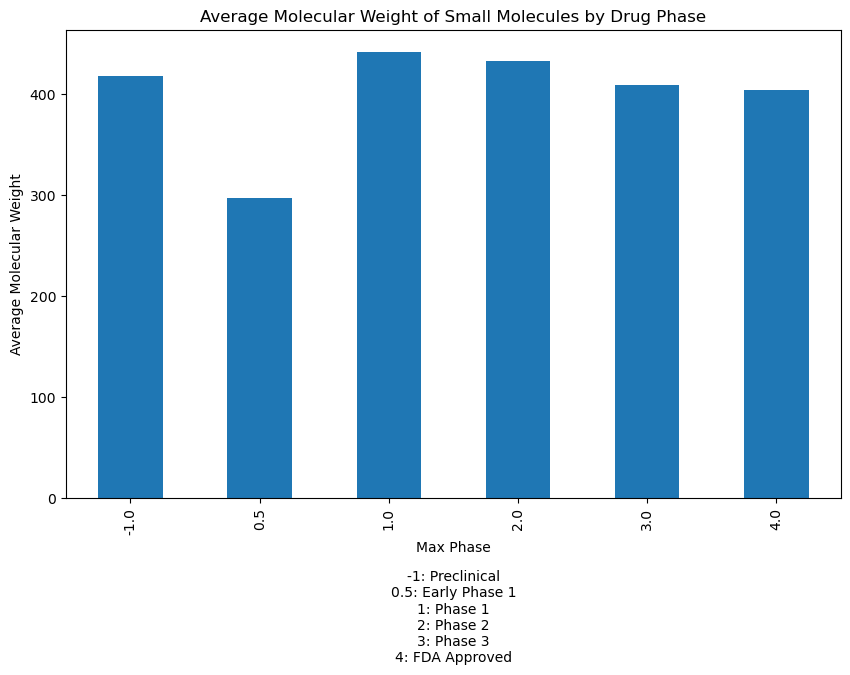

In [37]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_mwt_phases.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Average Molecular Weight')
plt.title('Average Molecular Weight of Small Molecules by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.35, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.1)

# Display the chart
plt.show()

# Almost all phases has average Mwt around 400 daltons

In [38]:
# Convert "clogP" column to numeric
df['CX LogD'] = pd.to_numeric(df['CX LogD'], errors='coerce')

clogP_phases = df[df['Type'] == 'Small molecule'].groupby('Max Phase')['CX LogD'].mean() #Number of small molecule that violate rule of 5 for each phase
print(clogP_phases)

Max Phase
-1.0    2.522817
 0.5    0.235000
 1.0    1.932574
 2.0    1.790880
 3.0    0.936775
 4.0    0.849637
Name: CX LogD, dtype: float64


In [39]:
# Convert "Polar Surface Area" column to numeric
df['Polar Surface Area'] = pd.to_numeric(df['Polar Surface Area'], errors='coerce')

average_PSA_phases = df[df['Type'] == 'Small molecule'].groupby('Max Phase')['Polar Surface Area'].mean() #avergae PSA for each phase of small molecule

print(average_PSA_phases)


Max Phase
-1.0    81.467383
 0.5    75.595500
 1.0    93.035854
 2.0    90.072422
 3.0    93.627230
 4.0    78.072112
Name: Polar Surface Area, dtype: float64


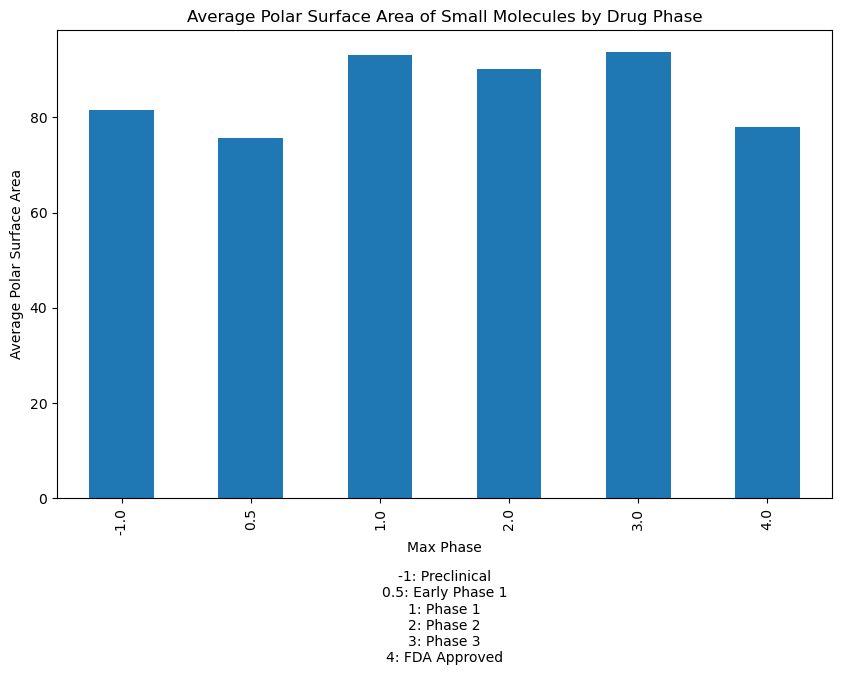

In [40]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_PSA_phases.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Average Polar Surface Area')
plt.title('Average Polar Surface Area of Small Molecules by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.35, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.1)

# Display the chart
plt.show()


# Almost all phases has PSA around 80 

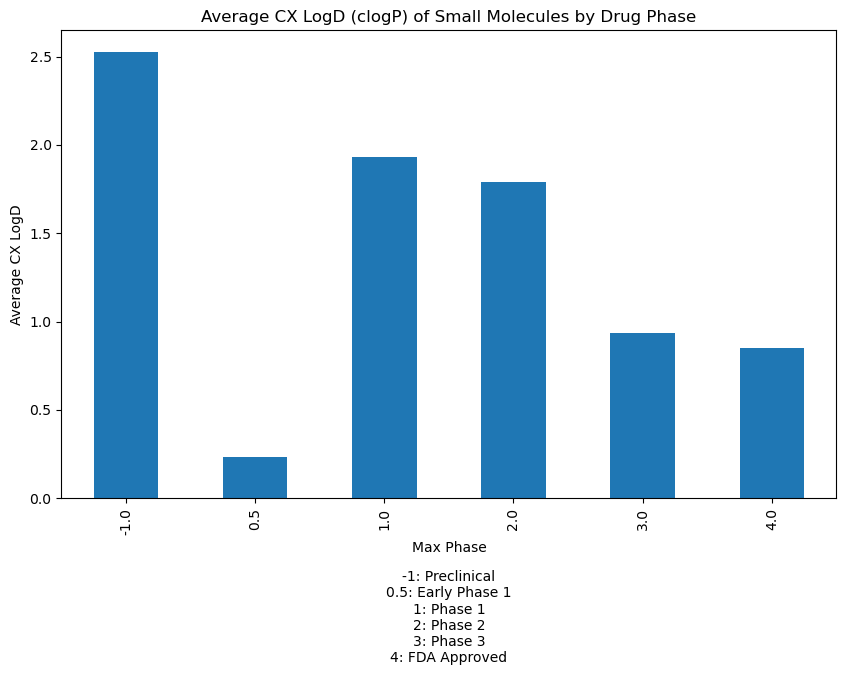

In [41]:
# Create a bar chart
plt.figure(figsize=(10, 6))
clogP_phases.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Average CX LogD')
plt.title('Average CX LogD (clogP) of Small Molecules by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.35, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.1)

# Display the chart
plt.show()

# Most of Phase 3 and FDA Approved drugs has lower than 1 clogP

In [42]:
RO5_vio_phases = df[df['Type'] == 'Small molecule'].groupby('Max Phase')['#RO5 Violations (Lipinski)'].count() #Number of small molecule that violate rule of 5 for each phase
print(RO5_vio_phases)

Max Phase
-1.0    1911522
 0.5         21
 1.0        843
 2.0       1571
 3.0       1061
 4.0       3524
Name: #RO5 Violations (Lipinski), dtype: int64


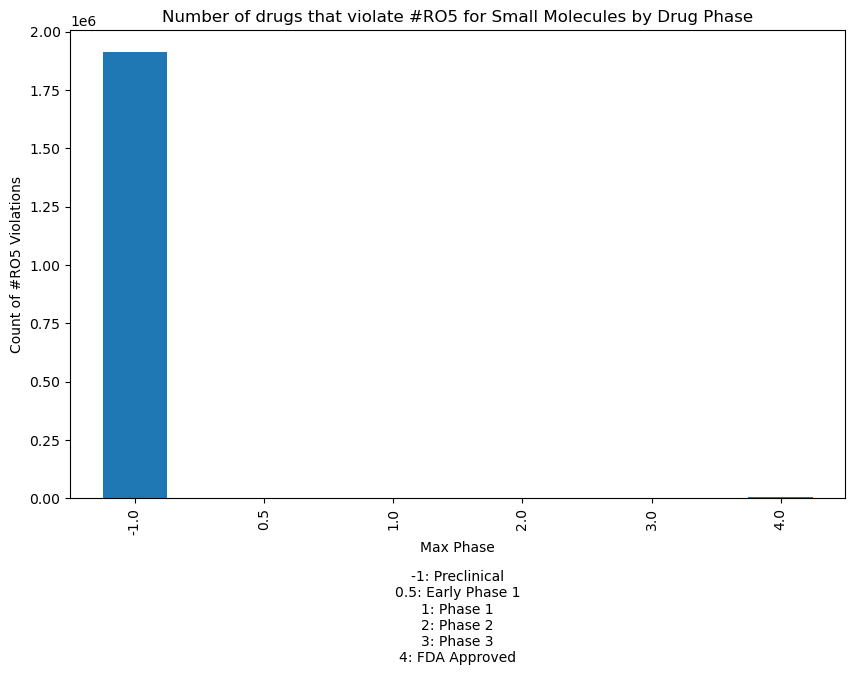

In [43]:
# Create a bar chart
plt.figure(figsize=(10, 6))
RO5_vio_phases.plot(kind='bar')

# Add labels and title
plt.xlabel('Max Phase')
plt.ylabel('Count of #RO5 Violations')
plt.title('Number of drugs that violate #RO5 for Small Molecules by Drug Phase')

# Add a subtitle indicating drug phases
plt.text(0.5, -0.35, "-1: Preclinical\n0.5: Early Phase 1\n1: Phase 1\n2: Phase 2\n3: Phase 3\n4: FDA Approved",
         transform=plt.gca().transAxes, fontsize=10, ha='center')

# Adjust the bottom margin
plt.subplots_adjust(bottom=0.1)

# Display the chart
plt.show()

# 99% has at least 1 violation to Lib RO5